<a href="https://colab.research.google.com/github/Artem7davlet/artem_git/blob/main/MathStat.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Арсен

In [ ]:
print("Арсен")

Арсен


Артем

# **Логистическая регрессия**

Для начала вспомним немного о линейной регрессии:

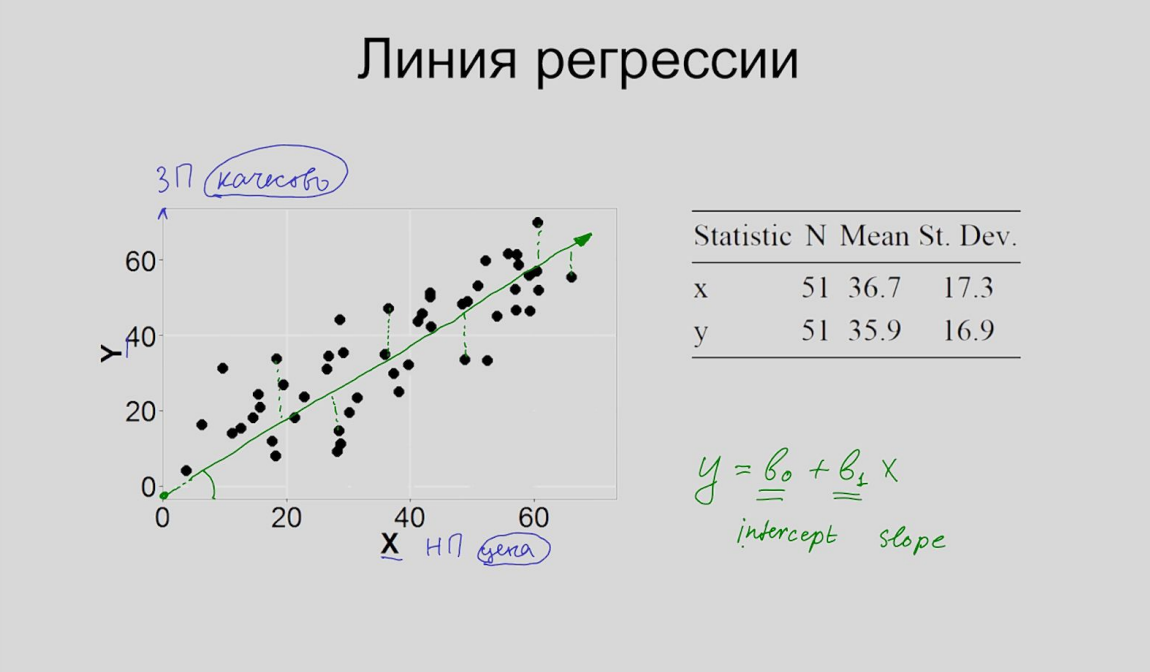

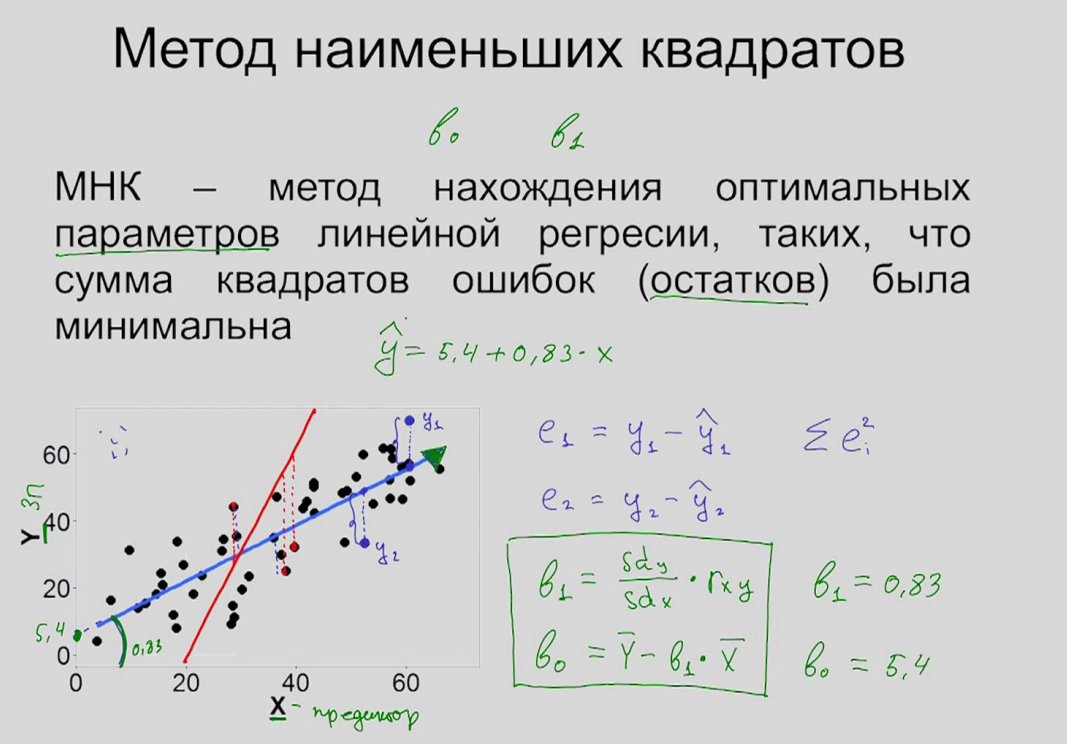

Итак, вернёмся к логистической регрессии

Логистическая регрессия используется для исследования взаимосвязи между номинативной зависимой переменной, имеющей всего 2 градации, и различными независимыми переменными (в качестве предикторов могут быть как номинативные, так и количественные переменные).
Номинативную переменную с двумя градациями можно представить как два зависимых друг от друга вероятностных исхода, равных p и (1 - p).
Тогда регрессионная модель, в которой зависимая переменная — это номинативная переменная с двумя градациями:

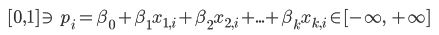

Мы хотим зависимую переменную выразить через линейную комбинацию предикторов, где коэффицент перед предиктором будет говорить о степени влияния этой независимой переменной на зависимую переменную

Первая проблема, с которой мы столкнёмся, это то, что левая часть уравнения это номинативная зависимая переменная с двумя градациями, а правая часть, это линейная комбинация наших предикторов, которая может выдавать нам в сумме число в промежутке (-∞, +∞)

Так как независимая переменная имеет две градации, можно перейти к непрерывному показателю, вероятности наступления положительного исхода, который варьируется от 0 до 1.  


Уравнение логистической регрессии:

\begin{equation}
\log(\text{odds}) = B_0 + B_1 x_1 + B_2 x_2 + \ldots + B_k x_k
\end{equation}, где log - натуральный логарифм, odds - шансы положительного исхода


\begin{equation}
p = \frac{1 + e^{\log(\text{odds})}}{e^{\log(\text{odds})}}
\end{equation}, где p - вероятность положительного исхода

Почему же тут используется натуральный логарифм шансов?

Проследим за различным соотношением положительных и отрицательных исходов и рассчитанными на их основе вероятностью, шансами и натуральным логарифмом шансов (далее просто "логарифм шансов").

Вероятность - число от нуля до единицы

Шансы - число от нуля до плюс бесконечности

Логарифм шансов - число от минус бесконечности до плюс бесконечности

Именно поэтому, нам лучше всего использовать его, зная логарифм шансов, мы можем рассчитать вероятность

# **Шансы и вероятность**

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf

Разберем на примере подбрасывания монетки. Пусть у нас было 10 бросков и мы получили следующие результаты:

1 - орел (в примере мы хотим, чтобы выпадали орлы, это будет положительный исход)

0 - решка (отрицательный исход)

In [ ]:
df = pd.DataFrame({'coin_state': [0, 0, 1, 0, 0, 0, 1, 0, 0, 0]})
df

,coin_state
0,0
1,0
2,1
3,0
4,0
5,0
6,1
7,0
8,0
9,0


In [ ]:
# 2 орла, 8 решек
df.coin_state.value_counts()

coin_state
0    8
1    2
Name: count, dtype: int64

Рассчитаем вероятность:
\begin{equation}
p = \frac{\text{pos}}{\text{pos} + \text{neg}}
\end{equation}

In [ ]:
pos = df.coin_state.value_counts()[1]   # количество положительных исходов
neg = df.coin_state.value_counts()[0]   # количество отрицательных исходов

p = pos / (pos + neg)
p

0.2

Рассчитаем шансы:\begin{equation}
\text{odds} = \frac{\text{pos}}{\text{neg}}
\end{equation}

In [ ]:
odds = pos / neg
odds

0.25

Шансы можно посчитать, зная вероятность:\begin{equation}
\text{odds} = \frac{p}{1-p}
\end{equation}

In [ ]:
p / (1 - p)

0.25

Вероятность можно посчитать, зная шансы:\begin{equation}
p = \frac{\text{odds}}{1 + \text{odds}}
\end{equation}

In [ ]:
odds / (1 + odds)

0.2

Визуализируем зависимость вероятности от логарифма шансов:


In [ ]:
pd.DataFrame({
    'pos': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'neg': [10, 0, 8, 7, 6, 5, 4, 3, 2, 1, 0],
    'p': [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1],
    'odds': [0, 0.11, 0.25, 0.43, 0.66, 1, 1.5, 2.33, 4, 9, np.nan],
    'log(odds)': [np.nan, -2.2, -1.39, -0.85, -0.41, 0, 0.41, 0.85, 1.39, 2.2, np.nan],
})

,pos,neg,p,odds,log(odds)
0,0,10,0.0,0.00,NaN
1,1,0,0.1,0.11,-2.20
2,2,8,0.2,0.25,-1.39
3,3,7,0.3,0.43,-0.85
4,4,6,0.4,0.66,-0.41
5,5,5,0.5,1.00,0.00
6,6,4,0.6,1.50,0.41
7,7,3,0.7,2.33,0.85
8,8,2,0.8,4.00,1.39
9,9,1,0.9,9.00,2.20


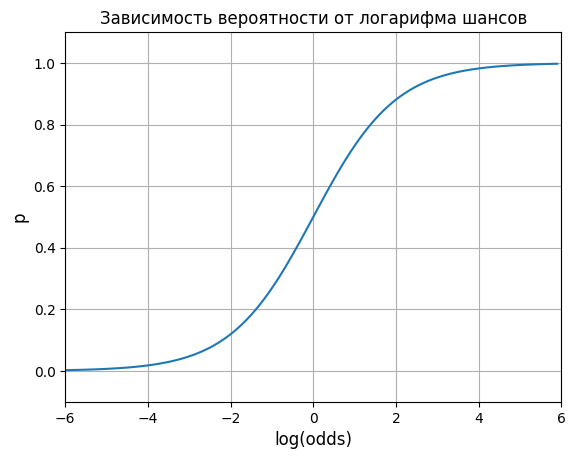

In [ ]:
log_odds = np.arange(-6, 6, 0.1)
p = np.exp(log_odds) / (1 + np.exp(log_odds))

plt.plot(log_odds, p)
plt.grid()
plt.xlim(-6, 6)
plt.ylim(-0.1, 1.1)
plt.title('Зависимость вероятности от логарифма шансов', fontsize=12)
plt.xlabel('log(odds)', fontsize=12)
plt.ylabel('p', fontsize=12)

plt.show()
plt.close()

Картинка получше:


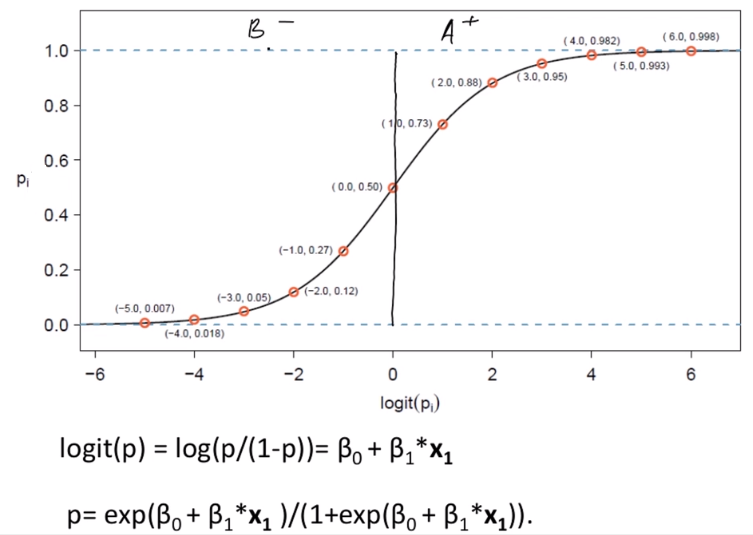

Предположим, мы подбросили монетку 100 раз, и 70 раз выпал орел. Чему равняется натуральный логарифм шансов выпадения решки?

In [ ]:
import math
math.log(30/70)

-0.8472978603872037

Предположим, что мы получили логарифм шансов выпадения решки, равный -1. Тогда вероятность выпадения решки равняется...

In [ ]:
math.exp(-1) / (1 + math.exp(-1))


0.2689414213699951

# Модель без предикторов (Intercept only model)

\begin{equation}
\log(\text{odds}) = B_0 + B_1 x_1 + B_2 x_2 + \ldots + B_k x_k
\end{equation}

Модель без предикторов описывается уравнением: y = intercept (одному числу, без предикторов)

Intercept - натуральный логарифм шансов положительного исхода. И свободный член логистической регресии.

Т.е. мы хотим предсказать логарифм шансов, используя только одно число: log( p/(1-p) ) = intercept


H0: Нет никакой разницы между исходом №1 и исходом №2 и нормальное распределение описывает распределение коэффициентов логистической регрессии:

p = 1 - p;
odds = 1;
Логарифм шансов logit(p) = 0 , т.е. logit(p) (он же intercept) имеет нормальное распределение со средним равным 0

Рассмотрим модели на примере известного датасета о Титанике

In [13]:
# Датасет Титаника
df = pd.read_csv('https://stepic.org/media/attachments/course/524/train.csv')
df = df[df.Age.notnull()]
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
glm_binomial = smf.glm(formula='Survived ~ 1', data=df, family=sm.families.Binomial()).fit()
glm_binomial.summary()
# Intercept - логарифм шансов (шансов выжить)

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               Survived   No. Observations:                  714
Model:                            GLM   Df Residuals:                      713
Model Family:                Binomial   Df Model:                            0
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -482.26
Date:                Sun, 12 May 2024   Deviance:                       964.52
Time:                        20:12:06   Pearson chi2:                     714.
No. Iterations:                     4   Pseudo R-squ. (CS):          3.331e-16
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.3799      0.076     -4.985      0.000      -0.529      -0.230
==============================================================================
"""

Важное пояснение:

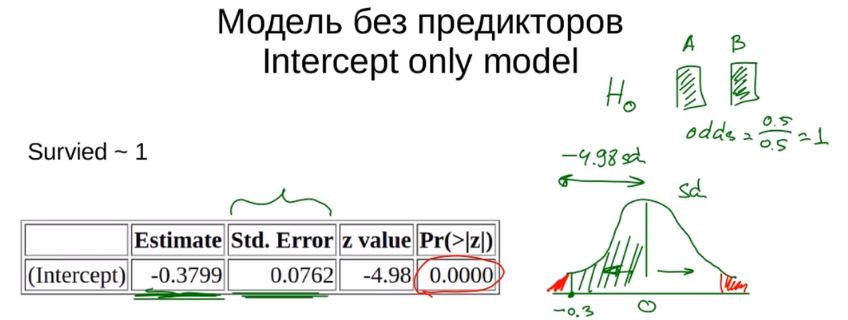

Интерпретация расчётной таблицы:

Estimate - значение intercept (логарифма шансов)

Полученная в расчётах стандартная ошибка (se) - это стандартное отклонение, которое имело бы нормальное распределение коэфициента intercept со средним равным 0

Тогда если разделить значение коэфициента intercept на стандартную ошибку, то получим z-value – расстояние до 0 в стандартных отклонениях.

Pr(>|z|) - значение p-value, т.е. вероятность получить такое или ещё более сильное отличие intercept от 0 при условии, что верна нулевая гипотеза

Итак, мы получили модель:

log(odds) = -0.3799

 Распределение частот ЗП:

In [ ]:
df.Survived.value_counts()

Survived
0    424
1    290
Name: count, dtype: int64

<ipython-input-20-797073c09db0>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Survived', data=df, palette='hls')


<Axes: xlabel='Survived', ylabel='count'>

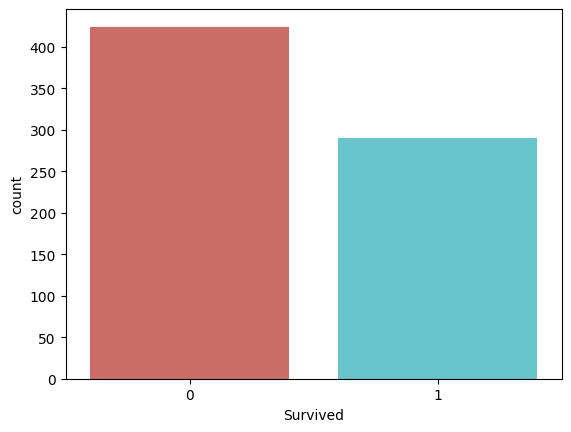

In [ ]:
sns.countplot(x='Survived', data=df, palette='hls')

In [ ]:
# df.Survived.value_counts()[1] - количество выживших 290
# df.Survived.value_counts()[0] - количество погибших 424
odds = df.Survived.value_counts()[1] / df.Survived.value_counts()[0]
odds

0.6839622641509434

In [ ]:
# Логарифм шансов - это и есть Intercept.
log_odds = np.log(odds)
log_odds

-0.379852532251438

In [ ]:
# Рассчитаем шансы:
odds = np.exp(log_odds)
odds

0.6839622641509434

In [ ]:
# Рассчитаем вероятность:
p = odds / (1 + odds)
p

0.4061624649859944

In [ ]:
# aic - показатель остатков модели.
# Чем он ниже, тем лучше модель (по аналогии с суммой квадратов остатков в линейной регрессии).
glm_binomial.aic

966.5159648555248

Задачка:

С помощью логистической регрессии без предикторов мы захотели узнать, правда ли,
что сдавая Сергею Владимировичу Симушкину, легче провалить экзамен, чем сдать.
В нашей выборке было 50 студентов. Часть из них сдала экзамен (положительный исход),
а часть - нет (отрицательный исход). Свободный член нашей регрессии (Intercept) оказался равен -0.8472979.
Сколько человек всё-таки сдало экзамен?

In [ ]:
def find_n_sdalo (logit_p, n_vsego):
    p = math.exp(logit_p) / (1 + math.exp(logit_p))
    n_sdalo = round(p * n_vsego)
    return n_sdalo

logit_p = -0.8472979
n_vsego = 50

find_n_sdalo (logit_p, n_vsego)

15

Задачка:

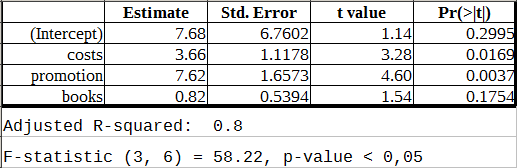

Исследователей заинтересовал вопрос, какие факторы взаимосвязаны с показателем кассовых сборов фильма. Для этих целей был применен множественный регрессионный анализ: зависимая переменная - сборы фильма в первый год после выхода на экраны - в миллионах долларов  (receipts)

Независимые переменные, которые были включены в анализ:

1. бюджет фильма (cost) - в миллионах долларов  

2. средства потраченные на рекламу фильма (promotion) -  в миллионах долларов

3. количество проданных книг, на основе которых был снят фильм (books) -  в миллионах проданных экземпляров

Основываясь на результатах анализа, постройте уравнение регрессии:

receipts=B0 + B1 * cost + B2 * promotion + B3 * books

К вам обратился продюсер, который снимает кино, он наслышан, что при помощи статистики можно получить ответы на все вопросы! Компания уже потратила 10 миллионов на производство фильма (cost), а также было продано 8 миллионов книг (books). Продюсер интересуется, сколько вы посоветуете ему потратить миллионов на рекламу фильма (promotion), если он хочет, чтобы сборы от фильма составили 150 миллионов?

# **Модель с одним номинативным предиктором:**

В отличии от предыдущей модели, здесь добавляется предиктор (пол):

In [14]:
glm_binomial = smf.glm(formula='Survived ~ C(Sex)', data=df, family=sm.families.Binomial()).fit()
glm_binomial.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               Survived   No. Observations:                  714
Model:                            GLM   Df Residuals:                      712
Model Family:                Binomial   Df Model:                            1
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -375.35
Date:                Mon, 13 May 2024   Deviance:                       750.70
Time:                        07:43:56   Pearson chi2:                     714.
No. Iterations:                     4   Pseudo R-squ. (CS):             0.2588
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          1.1243      0.144      7.814      0.000       0.842       1.406
C(Sex)[T.male]    -2.4778      0.185    -13.392      0.000      -2.840      -2.115
==================================================================================
"""

Таблица зависимостей шансов выжить у мужчин и женщин:

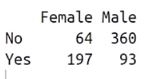

odds_male = 93 / 360 = 0.26

odds_female = 197 / 64 = 3.08

Intercept, как правило, берёт первый предиктор в алфавитном порядке, тогда в данной задаче
intercept - натуральный логарифм шансов положительного исхода для женщин
log(odds_female) = 1.12

коэф-т при Х - натуральный логарифм отношения шансов положительного исхода для мужчин и шансов для женщин (он же - разность логарифмов шансов)
odds_ratio = odds_male / odds_female
log(odds_ratio) = - 2.48
По свойству логарифмов: log(odds_ratio) = log(odds_male) - log(odds_female)

Т.к. переменные Female и Male зависимы друг от друга (мультиколлинеарны!),
разумно в построении модели использовать только одну из них (любую, у нас выбраны женщины, просто по алфавиту), а вторую назначить значением intercept. Поэтому, смотрим, какой градации-предиктора нет среди коэффициентов, это и будет intercept

Text(0, 0.5, 'Количество')

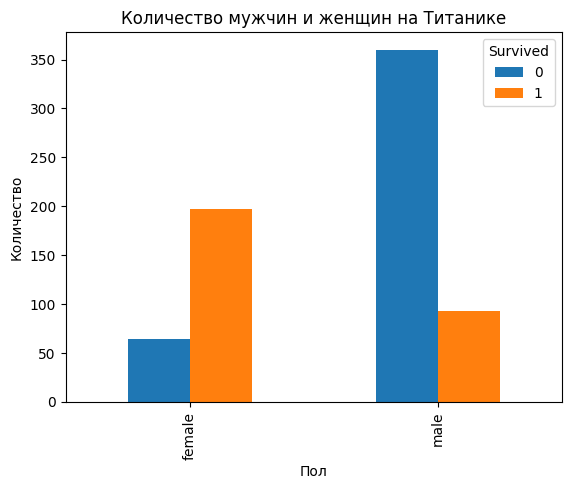

In [15]:
# Визуализировать таблицу сопряженности можно так:
pd.crosstab(df.Sex, df.Survived).plot(kind='bar')
plt.title('Количество мужчин и женщин на Титанике')
plt.xlabel('Пол')
plt.ylabel('Количество')

In [17]:
# Таблица сопряженности между переменными выжил/не выжил и пол
cross_table = pd.crosstab(df.Survived, df.Sex)
cross_table

Sex,female,male
Survived,,
0,64,360
1,197,93


In [18]:
# cross_table.female[0] - количество погибших женщин
# cross_table.female[1] - количество выживших женщин
odds_female = cross_table.female[1] / cross_table.female[0]
odds_female

3.078125

In [19]:
# Логарифм шансов для женщин - это и есть Intercept
np.log(odds_female)

1.1243206453783166

In [20]:
# cross_table.male[0] - количество погибших мужчин
# cross_table.male[1] - количество выживших мужчин
odds_male = cross_table.male[1] / cross_table.male[0]
odds_male

0.25833333333333336

In [21]:
odds_ratio = odds_male / odds_female
odds_ratio

0.08392554991539763

In [22]:
np.log(odds_ratio)
# Логарифм отношения шансов для мужчин к шансам для женщин - это и есть значение C(Sex)[T.male]

-2.4778251836752165

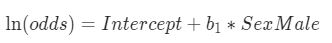

log(odds_female) = 1.12 - 2.48 * Sex_Male = 1.12 - 2.48 * 0 = 1.12

log(odds_male) = 1.12 - 2.48 * Sex_Male = 1.12 - 2.48 * 1 = - 1.35

In [23]:
# Получаем модель:
# log(odds) = 1.1243 - (2.4778 * Sex_male)

# Если предсказываем логарифм шансов для женщин (Sex_male = 0):
# log(odds) = 1.1243 - (2.4778 * 0)
# log(odds) = 1.1243

# Если предсказываем логарифм шансов для мужчин (Sex_male = 1):
# log(odds) = 1.1243 - (2.4778 * 1)
# log(odds) = 1.1243 - 2.4778
# log(odds) -1.3535

log_odds_male = 1.1243 - 2.4778
log_odds_male

-1.3534999999999997

In [24]:
# aic у этой модели ниже, чем у предыдущей, значит эта модель лучше.
glm_binomial.aic

754.7002061466515

Интерпетация таблицы, если значений зависимой переменной более двух:

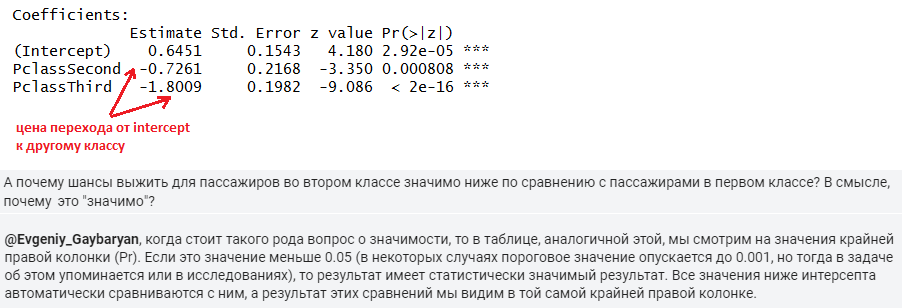

# **Модель с двумя номинативными предикторами:**

In [25]:
glm_binomial = smf.glm(formula='Survived ~ C(Sex) * C(Pclass)', data=df, family=sm.families.Binomial()).fit()
glm_binomial.summary()
# Intercept      - логарифм шансов для Ж в 1кл
# C(Sex)[T.male] - логарифм отношения шансов для М в 1кл к шансам Ж в 1кл
# C(Pclass)[T.2] - логарифм отношения шансов для Ж во 2кл к шансам Ж в 1кл
# C(Pclass)[T.3] - логарифм отношения шансов для Ж в 3кл к шансам Ж в 1кл
# C(Sex)[T.male]:C(Pclass)[T.2] - разность логарифмов отношения шансов, рассчитанных для М/Ж во 2кл и М/Ж в 1кл
# C(Sex)[T.male]:C(Pclass)[T.3] - разность логарифмов отношения шансов, рассчитанных для М/Ж во 3кл и М/Ж в 1кл

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               Survived   No. Observations:                  714
Model:                            GLM   Df Residuals:                      708
Model Family:                Binomial   Df Model:                            5
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -321.14
Date:                Mon, 13 May 2024   Deviance:                       642.28
Time:                        08:08:18   Pearson chi2:                     714.
No. Iterations:                     6   Pseudo R-squ. (CS):             0.3632
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept                         3.3081      0.588      5.628      0.000       2.156       4.460
C(Sex)[T.male]                   -3.7301      0.622     -5.997      0.000      -4.949      -2.511
C(Pclass)[T.2]                   -0.8804      0.726     -1.213      0.225      -2.303       0.542
C(Pclass)[T.3]                   -3.4653      0.620     -5.585      0.000      -4.681      -2.249
C(Sex)[T.male]:C(Pclass)[T.2]    -0.4204      0.804     -0.523      0.601      -1.997       1.156
C(Sex)[T.male]:C(Pclass)[T.3]     2.1542      0.676      3.185      0.001       0.829       3.480
=================================================================================================
"""

In [26]:
# Таблица сопряженности между переменными выжил/не выжил и классом пассажира для женщин.
cross_table_female = pd.crosstab(df[df.Sex == 'female'].Survived, df.Pclass)
cross_table_female

Pclass,1,2,3
Survived,,,
0,3,6,55
1,82,68,47


Text(0, 0.5, 'Количество')

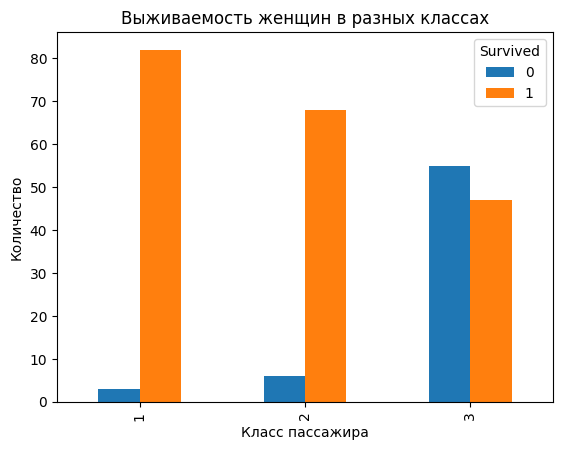

In [27]:
pd.crosstab(df.Pclass[df.Sex == 'female'], df.Survived).plot(kind='bar')
plt.title('Выживаемость женщин в разных классах')
plt.xlabel('Класс пассажира')
plt.ylabel('Количество')

In [28]:
# Таблица сопряженности между переменными выжил/не выжил и классом пассажира для мужчин.
cross_table_male = pd.crosstab(df[df.Sex == 'male'].Survived, df.Pclass)
cross_table_male

Pclass,1,2,3
Survived,,,
0,61,84,215
1,40,15,38


Text(0, 0.5, 'Количество')

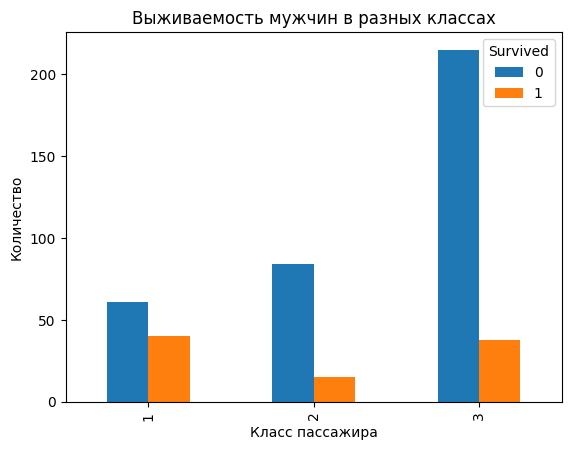

In [29]:
pd.crosstab(df.Pclass[df.Sex == 'male'], df.Survived).plot(kind='bar')
plt.title('Выживаемость мужчин в разных классах')
plt.xlabel('Класс пассажира')
plt.ylabel('Количество')

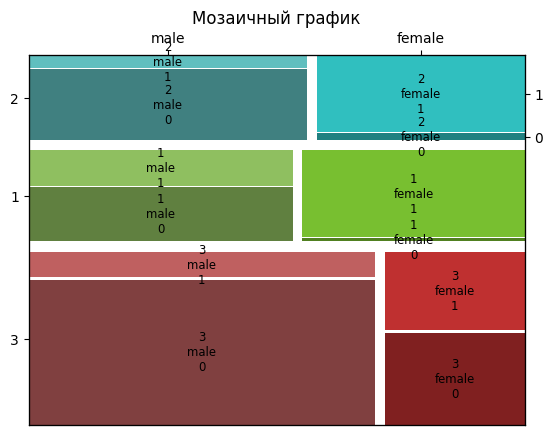

In [30]:
# График сопряженности между классом пассажира, полом и переменной выжил/не выжил.

from statsmodels.graphics.mosaicplot import mosaic

mosaic(df, ['Pclass', 'Sex', 'Survived'], title='Мозаичный график', horizontal=0, gap=0.03)
plt.show()

In [33]:
odds_female_pc1 = cross_table_female[1][1] / cross_table_female[1][0]
odds_female_pc1

27.333333333333332

In [32]:
np.log(odds_female_pc1)
# Это значение Intercept

3.3081069585961433

In [34]:
odds_male_pc1 = cross_table_male[1][1] / cross_table_male[1][0]
odds_male_pc1

0.6557377049180327

In [35]:
np.log(odds_male_pc1 / odds_female_pc1)
# Это значение C(Sex)[T.male]

-3.7301013686555184

In [36]:
odds_female_pc2 = cross_table_female[2][1] / cross_table_female[2][0]
odds_female_pc2

11.333333333333334

In [37]:
np.log(odds_female_pc2 / odds_female_pc1)
# Это значение C(Pclass)[T.2]

-0.8803587226480917

In [38]:
odds_female_pc3 = cross_table_female[3][1] / cross_table_female[3][0]
odds_female_pc3

0.8545454545454545

In [39]:
np.log(odds_female_pc3 / odds_female_pc1)
# Это значение C(Pclass)[T.3]

-3.4652925421185556

In [40]:
odds_male_pc2 = cross_table_male[2][1] / cross_table_male[2][0]
odds_male_pc2

0.17857142857142858

In [41]:
np.log(odds_male_pc2 / odds_female_pc2) - np.log(odds_male_pc1 / odds_female_pc1)
# Это значение C(Sex)[T.male]:C(Pclass)[T.2]

-0.42041346503363686

In [42]:
odds_male_pc3 = cross_table_male[3][1] / cross_table_male[3][0]
odds_male_pc3

0.17674418604651163

In [43]:
np.log(odds_male_pc3 / odds_female_pc3) - np.log(odds_male_pc1 / odds_female_pc1)
# Это значение C(Sex)[T.male]:C(Pclass)[T.3]

2.154235083776654

In [44]:
# Получаем модель:
# log(odds) = 3.3081 - (3.7301 * Sex_male) - (0.8804 * Pclass2) - (3.4653 * Pclass3) - (0.4204 * Sex_male * Pclass2) + (2.1542 * Sex_male * Pclass3)

# Если предсказываем логарифм шансов для Ж в 1кл (Sex_male = 0, Pclass2 = 0, Pclass3 = 0):
# log(odds) = 3.3081 - (3.7301 * 0) - (0.8804 * 0) - (3.4653 * 0) - (0.4204 * 0 * 0) + (2.1542 * 0 * 0)
# log(odds) = 3.3081

# Если предсказываем логарифм шансов для М в 1кл (Sex_male = 1, Pclass2 = 0, Pclass3 = 0):
# log(odds) = 3.3081 - (3.7301 * 1) - (0.8804 * 0) - (3.4653 * 0) - (0.4204 * 1 * 0) + (2.1542 * 1 * 0)
# log(odds) = 3.3081 - 3.7301
# log(odds) = -0.422

log_odds_male = 3.3081 - 3.7301
log_odds_male

-0.42200000000000015

In [45]:
# Если предсказываем логарифм шансов для Ж во 2кл (Sex_male = 0, Pclass2 = 1, Pclass3 = 0):
# log(odds) = 3.3081 - (3.7301 * 0) - (0.8804 * 1) - (3.4653 * 0) - (0.4204 * 0 * 1) + (2.1542 * 0 * 0)
# log(odds) = 3.3081 - 0.8804
# log(odds) = 2.4277

log_odds_female_pc2 = 3.3081 - 0.8804
log_odds_female_pc2

2.4277

In [46]:
# Если предсказываем логарифм шансов для Ж в 3кл (Sex_male = 0, Pclass2 = 0, Pclass3 = 1):
# log(odds) = 3.3081 - (3.7301 * 0) - (0.8804 * 0) - (3.4653 * 1) - (0.4204 * 0 * 0) + (2.1542 * 0 * 1)
# log(odds) = 3.3081 - 3.4653
# log(odds) = -0.1572

log_odds_female_pc3 = 3.3081 - 3.4653
log_odds_female_pc3

-0.1572

In [47]:
# Если предсказываем логарифм шансов для М во 2кл (Sex_male = 1, Pclass2 = 1, Pclass3 = 0):
# log(odds) = 3.3081 - (3.7301 * 1) - (0.8804 * 1) - (3.4653 * 0) - (0.4204 * 1 * 1) + (2.1542 * 1 * 0)
# log(odds) = 3.3081 - 3.7301 - 0.8804 - 0.4204
# log(odds) = -1.7228

log_odds_male_pc2 = 3.3081 - 3.7301 - 0.8804 - 0.4204
log_odds_male_pc2

-1.7227999999999999

In [48]:
# Если предсказываем логарифм шансов для М в 3кл (Sex_male = 1, Pclass2 = 0, Pclass3 = 1):
# log(odds) = 3.3081 - (3.7301 * 1) - (0.8804 * 0) - (3.4653 * 1) - (0.4204 * 1 * 0) + (2.1542 * 1 * 1)
# log(odds) = 3.3081 - 3.7301 - 3.4653 + 2.1542
# log(odds) = -1.7331

log_odds_male_pc3 = 3.3081 - 3.7301 - 3.4653 + 2.1542
log_odds_male_pc3

-1.7331000000000003

In [49]:
# aic у этой модели ниже, чем у двух предыдущих, значит эта модель лучше.
glm_binomial.aic

654.2750443468178

# **Комбинация предикторов разного типа:**

Модель, в которой учитываются и количественные и номинативные переменные

In [50]:
glm_binomial = smf.glm(formula='Survived ~ C(Sex) + C(Pclass) + Age', data=df, family=sm.families.Binomial()).fit()
glm_binomial.summary()

# Intercept - логарифм шансов для Ж в 1кл при условии, что их возраст равен нулю.
# Age - коэффициент при возрасте показывает, на сколько изменяется логарифм шансов для базового уровня при единичном изменении возраста.
# Как бы странно это ни звучало, но в Intercept хранится логарифм шансов для Ж в 1кл в возрасте 0 лет.

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               Survived   No. Observations:                  714
Model:                            GLM   Df Residuals:                      709
Model Family:                Binomial   Df Model:                            4
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -323.64
Date:                Mon, 13 May 2024   Deviance:                       647.28
Time:                        08:32:51   Pearson chi2:                     767.
No. Iterations:                     5   Pseudo R-squ. (CS):             0.3587
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          3.7770      0.401      9.416      0.000       2.991       4.563
C(Sex)[T.male]    -2.5228      0.207    -12.164      0.000      -2.929      -2.116
C(Pclass)[T.2]    -1.3098      0.278     -4.710      0.000      -1.855      -0.765
C(Pclass)[T.3]    -2.5806      0.281     -9.169      0.000      -3.132      -2.029
Age               -0.0370      0.008     -4.831      0.000      -0.052      -0.022
==================================================================================
"""

In [51]:
# Получаем модель:
#log(odds) = 3.7770 - (2.5228 * Sex_male) - (1.3098 * Pclass2) - (2.5806 * Pclass3) - (0.0370 * Age)

# Если предсказываем логарифм шансов для Ж в 1кл в возрасте 20 лет:
# log(odds) = 3.7770 - (2.5228 * 0) - (1.3098 * 0) - (2.5806 * 0) - (0.0370 * 20)
# log(odds) = 3.7770 - (0.0370 * 20)
# log(odds) = 3.037

3.7770 - (0.0370 * 20)

3.037

In [53]:
# Если предсказываем логарифм шансов для М в 2кл в возрасте 30 лет:
# log(odds) = 3.7770 - (2.5228 * 1) - (1.3098 * 1) - (2.5806 * 0) - (0.0370 * 30)
# log(odds) = 3.7770 - (2.5228 * 1) - (1.3098 * 1) - (0.0370 * 30)
3.7770 - (2.5228 * 1) - (1.3098 * 1) - (0.0370 * 30)

-1.1656

In [52]:
# Модель без учета возраста была лучше
glm_binomial.aic

657.2831255018241

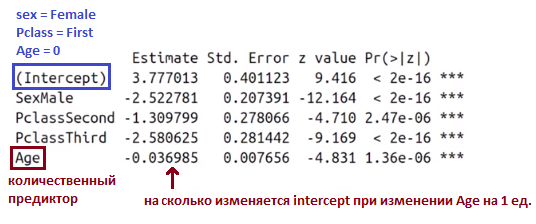

# **Непараметрические методы:**

Основная суть: параметрические критерии используют параметры распределения (среднее, стандартное отклонение) и применяются для нормальных распределений и близких к ним. Непараметрические критерии не используют такие параметры, а вместо этого ранжируют все данные от меньшего к большему, а затем сравнивают группы по рангам наблюдений в них.

**U-критерий Манна-Уитни:**

Непараметрический аналог t-критерия Стьюдента. Используется для оценки различий между двумя независимыми выборками, в которых признак измерен в метрической или ранговой шкале.

Самым популярным непараметрическим критерием для сравнения двух групп является U-критерий Манна — Уитни. Логика данного критерия заключается в том, что вместо сравнения средних значений в двух выборках критерий сравнивает сумму рангов (не медианы, как многие думают). Мы сначала упорядочиваем все данные, затем рассчитываем сумму рангов в каждой из групп.

 Затем для каждой из выборок рассчитывается показатель:

 ***Поменять на LaTeX формулу:***

𝑈
1
=
𝑅
1
−
𝑛
1
∗
(
𝑛
1
+
1
)
2
U
1
​
 =R
1
​
 −
2
n
1
​
 ∗(n
1
​
 +1)
​
  

𝑈
2
=
𝑅
2
−
𝑛
2
∗
(
𝑛
2
+
1
)
2
U
2
​
 =R
2
​
 −
2
n
2
​
 ∗(n
2
​
 +1)
​
  

Где
𝑅
1
,
𝑅
2
R
1
​
 ,R
2
​
  - это сумма рангов в двух группах, а
𝑛
1
,
𝑛
2
n
1
​
 ,n
2
​
  - число наблюдений.

Наименьшее из полученных значений и выступает в качестве статистики теста. Легко показать, что при условии верности нулевой гипотезы распределение этой статистики подчиняется нормальному распределению, где

𝜇
=
𝑛
1
∗
𝑛
2
2
μ=
2
n
1
​
 ∗n
2
​

​
  и  
𝜎
=
𝑛
1
∗
𝑛
2
∗
(
𝑛
1
+
𝑛
2
+
1
)
12
σ=
12
n
1
​
 ∗n
2
​
 ∗(n
1
​
 +n
2
​
 +1)
​

​
  

что и позволяет нам рассчитать вероятность получить наблюдаемые или еще более выраженные различия суммы рангов.

Разумно применять вместо t - теста:

Распределения хотя бы в одной из выборок значительно отличается от нормального.
Есть заметные выбросы в данных.
В некоторых задачах мощность теста даже выше, чем t критерия (например, когда обеих выборках наблюдается заметная асимметрия в одинаковом направлении).
Неразумно применять:

Выборки разного размера, с различным направлением асимметрии.  


**Критерий Краскела-Уоллиса:**

Если при сравнении трёх и более групп нарушаются требования и к гомогенности дисперсий и к нормальности распределений, лучше применять непараметрический аналог дисперсионного анализа - критерий Краскела-Уоллиса.

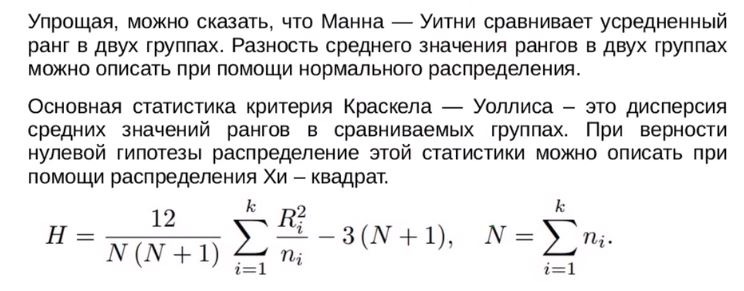

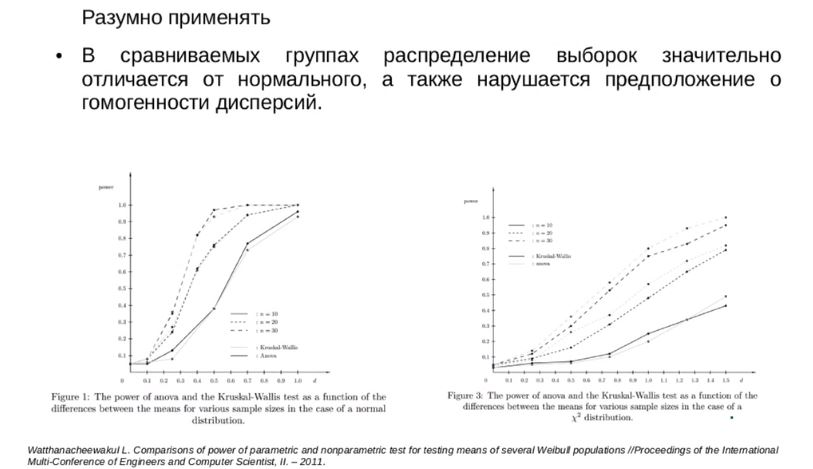

# **Доп. задача:**
Представьте, что мы работаем в аэропорту в службе безопасности и сканируем багаж пассажиров. В нашем распоряжении есть информация о результатах проверки багажа за предыдущие месяцы. Про каждую вещь мы знаем:

являлся ли багаж запрещенным - is_prohibited (No - разрешенный, Yes - запрещенный)
его массу (кг) - weight
длину (см) - length
ширину (см) - width
тип багажа (сумка или чемодан) - type.

Напишите функцию get_features , которая получает на вход набор данных о багаже. Строит логистическую регрессию, где зависимая переменная ﻿ - ﻿являлся ли багаж запрещенным, а предикторы - остальные переменные,﻿ и возвращает вектор с названиями статистически значимых переменных (p < 0.05) (в модели без взаимодействия). Если в данных нет значимых предикторов, функция возвращает строку с сообщением  "Prediction makes no sense".

In [55]:
import re
import statsmodels.formula.api as sf
import statsmodels.api as sm
from scipy.stats import chi2_contingency
import pandas as pd
import numpy as np
df = pd.read_csv(r'https://stepik.org/media/attachments/course/524/test_luggage_1.csv')

def get_features(data):
    result = []
    # Меняем значения зависимой переменной на 1 / 0
    data.is_prohibited[data.is_prohibited == 'Yes'] = 1
    data.is_prohibited[data.is_prohibited == 'No'] = 0
    # ЛОГИСТИЧЕСКАЯ РЕГРЕССИЯ
    logit_res = sf.glm('is_prohibited ~ C(type) + weight + length + width', data, family = sm.families.Binomial()).fit().summary()
    print(logit_res)
    coef_names = np.array([str(logit_res.tables[1][i][0]) for i in range(1, 6)])
    p_values = np.array([float(str(logit_res.tables[1][i][4])) for i in range(1, 6)])
    # Выбираем только те имена коэфициентов, для которых p_values < 0.05
    res1 = coef_names[p_values < 0.05]

    # Для номинативных зависимых переменных название коэфициентов будет отличаться от изначального
    # Например, 'C(type)[T.Suitcase]' вместо 'type'. Поэтому мы приводим их в изначальный вид
    result = [re.findall(name, r) for r in res1 for name in ['weight', 'length', 'width', 'type']]
    result = list(np.array([r for r in result if r]).ravel())

    # Если в массив результатов не пустой, возвращаем его, иначе - текст
    return result if len(result) else 'Prediction makes no sense'

get_features(df)

                            Generalized Linear Model Regression Results                             
Dep. Variable:     ['is_prohibited[0]', 'is_prohibited[1]']   No. Observations:                   60
Model:                                                  GLM   Df Residuals:                       55
Model Family:                                      Binomial   Df Model:                            4
Link Function:                                        Logit   Scale:                          1.0000
Method:                                                IRLS   Log-Likelihood:                -41.393
Date:                                      Mon, 13 May 2024   Deviance:                       82.785
Time:                                              08:50:24   Pearson chi2:                     60.0
No. Iterations:                                           4   Pseudo R-squ. (CS):           0.006523
Covariance Type:                                  nonrobust                                

<ipython-input-55-54220b18bef5>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.is_prohibited[data.is_prohibited == 'Yes'] = 1
<ipython-input-55-54220b18bef5>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.is_prohibited[data.is_prohibited == 'No'] = 0


'Prediction makes no sense'

# **Доп. инфа:**
Выбор метода под конкретную задачу:

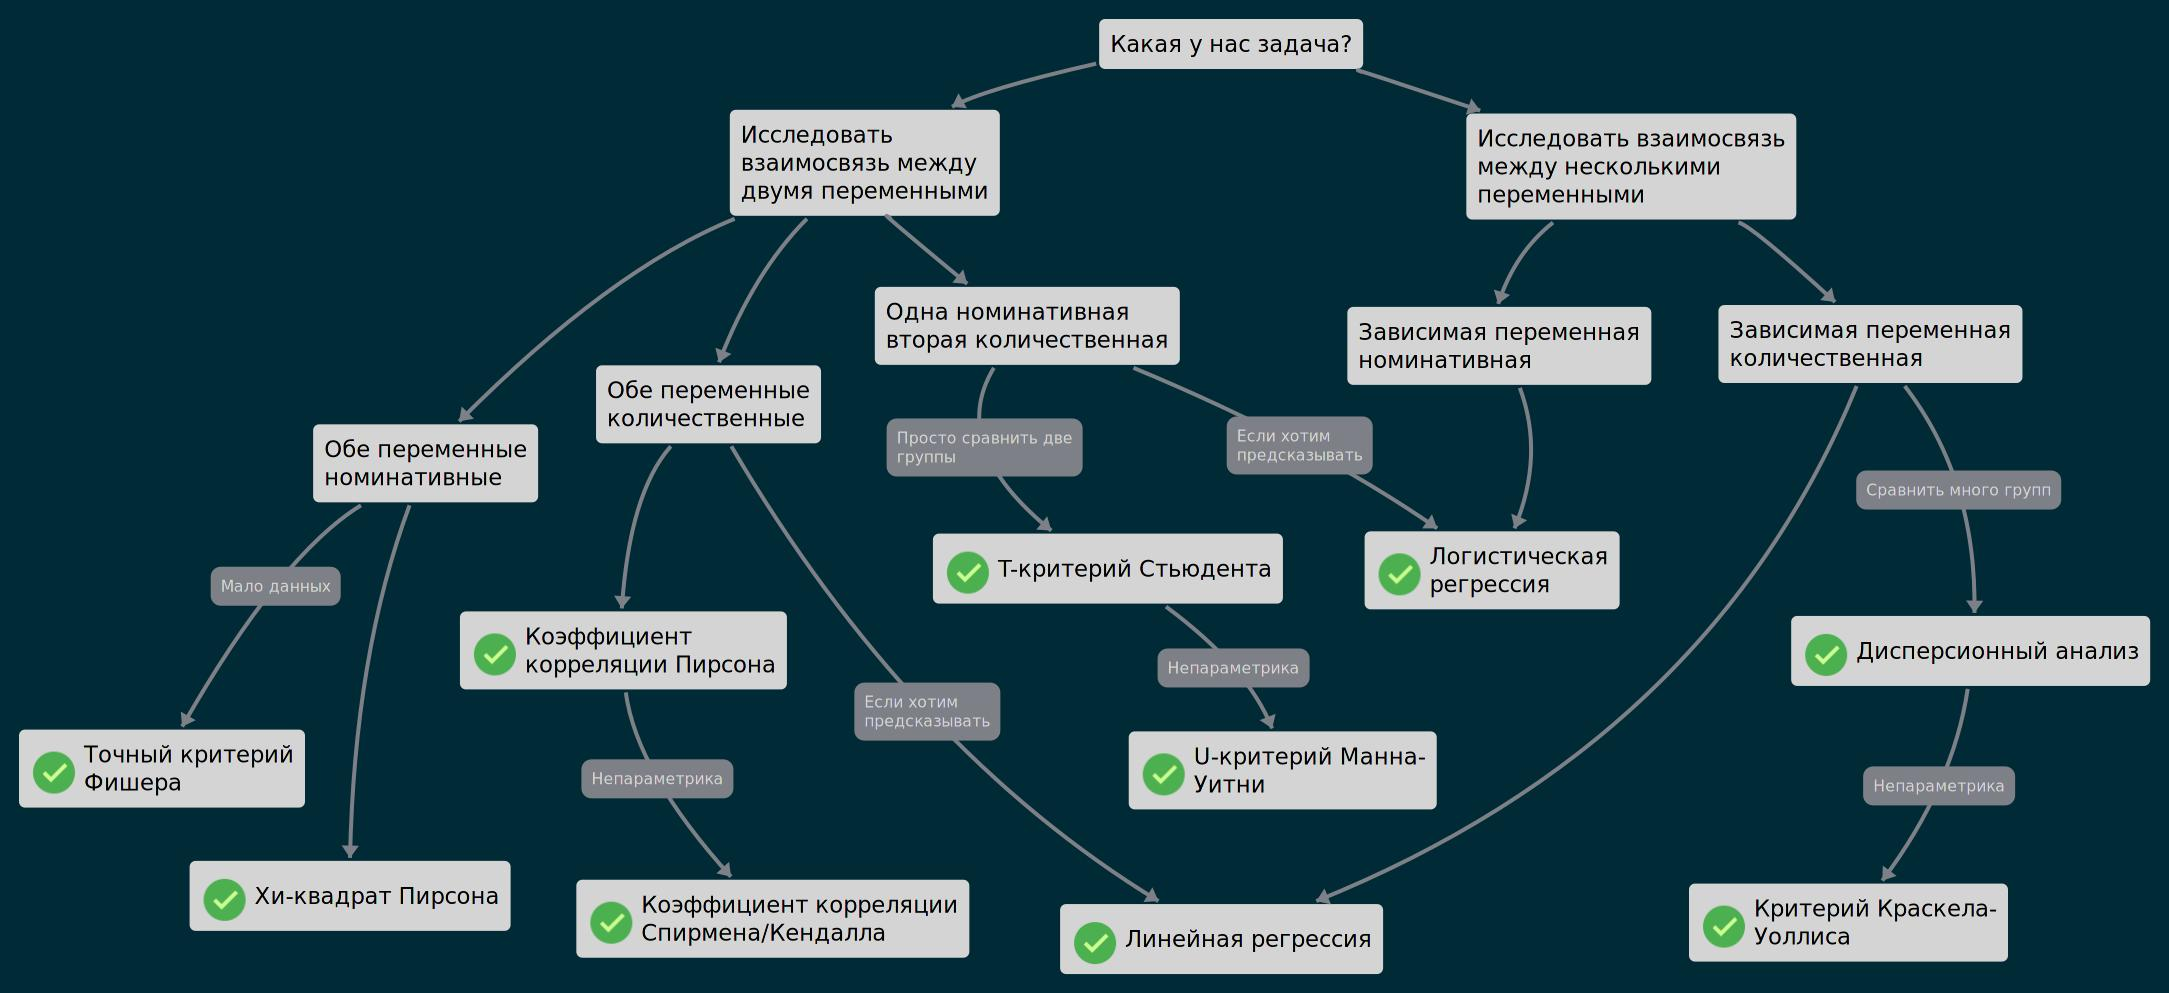

In [ ]:
print("Артем")

Артем


Ильнар

#Кластерный анализ и метод главных компонент

In [ ]:
print("Ильнар")

Ильнар
